# Exploratory Data Analysis of tweets on Australian Election

The dataset comprises of over 180,000 tweets on australian elections between the time 10.05.2019 and 20.05.2019.The dataset columns are 
* created_at: Date and time of tweet creation
* id: Unique ID of the tweet
* full_text: Full tweet text
* retweet_count: Number of retweets
* favorite_count: Number of likes
* user_id: User ID of tweet creator
* user_name: Username of tweet creator
* user_screen_name: Screen name of tweet creator
* user_description: Description on tweet creator's profile
* user_location: Location given on tweet creator's profile
* user_location: Location given on tweet creator's profile <br>

And loacation_geocode.csv contains latitude and longitude of the user.

#### Table of contents:
1. [Importing libraries](#import)
2. [Imporing dataframes](#data)
3. [Checking the head and shape of the dataframes](#heads)
4. [Merging the two dataframes](#merge)
5. [Checking for null values](#nulls)
6. [Getting the oldest and newest members in the dataframe](#old)
7. [Plotting number of tweets according to dates](#no)
8. [Plotting dates on which most accounts are created](#most)
9. [Getting the name of the day in the week](#week)<br>
      a. [Plotting the number of tweets by days of the week](#plot)<br>
      b. [Treemap of number of tweets by days of the week](#treemap1)<br>
      c. [Plotting the number of accounts created by days of the wee.](#plot2)<br>
      d. [Treemap of number of accounts created by days of the week](#treemap2)<br>
10. [Extracting hours from the date columns](#hour)<br>
      a. [Plotting number of tweets per hour](#hours1)<br>
      b. [Plotting number of accounts created per hour](#hours2)<br>
11. [Checking most retweeted and favourite tweet](#re)
12. [Wordclouds](#cloud)<br>
      a. [Wordcloud of user screen name](#cloud1)<br>
      b. [Wordcloud of user description](#cloud2)<br>
13. [Getting the sentiment of the tweets](#sentiment)
14. [Checking different tweets with different ploarities](#printing)
15. [Histogram plot of sentiment](#histse)
16. [Radar chart of polarities](#radar)
17. [Extracting features from tweets](#ext)<br>
      a. [Pairplot of text based features](#pair)
18. [Ngrams Visualisations of tweets](#n)
19. [Plotting number of tweets by state(Top 20)](#tweetsbystate)
20. [Visualizing number of tweets by state](#state)
21. [Tweets on Australia polls according to polarity by state](#bysate)
22. [Topic modeling](#model)<br>
       a. [Count Vectorizers for the data](#count)<br>
       b. [Applying Latent Dirichlet Allocation models](#lda)<br>
       c. [Visualizing LDA results of tweets with pyLDAvis](#py)<br>
    

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string
import re
import warnings 
warnings.filterwarnings('ignore')

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline


#PLOTLY
import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from collections import defaultdict
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)
from textblob import TextBlob
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import squarify

print(os.listdir('../input'))

['auspol2019.csv', 'location_geocode.csv']


## Importing the dataframes

In [2]:
twitter_data = pd.read_csv('../input/auspol2019.csv',parse_dates=['created_at','user_created_at'])
geo_data = pd.read_csv('../input/location_geocode.csv')

## Checking the head of the dataframes

In [3]:
twitter_data.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,@vanbadham We all understand we have a compuls...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59


In [4]:
geo_data.head()

,name,lat,long
0,"Brisbane, Queensland",-27.469771,153.025124
1,"Wollongong, NSW, AUSTRALIA",-34.427812,150.893061
2,Melbourne,-37.813628,144.963058
3,Philippines,12.879721,121.774017
4,Australia,-25.274398,133.775136


## Checking the shapes of the dataframes

In [5]:
twitter_data.shape

(183379, 11)

There are 183379 rows and 11 features 

In [6]:
geo_data.shape

(11153, 3)

There are 11153 rows and 3 columns

## Merging the two dataframes on user_location

In [7]:
#merging two data frames based on user location
twitter_data = twitter_data.merge(geo_data, how='inner', left_on='user_location', right_on='name')

## Checking the head of the dataframe

In [8]:
twitter_data.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at,name,lat,long
0,2019-05-20 09:13:44,1130401208756187136,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45,"Brisbane, Queensland",-27.469771,153.025124
1,2019-05-20 09:12:57,1130401009782673408,It is disappointing that @tanya_plibersek has ...,0.0,0.0,5.100258e+07,Matthew Rimmer,DrRimmer,Professor of IP & Innovation Law @QUTLaw @QUT_...,"Brisbane, Queensland",2009-06-26 10:17:54,"Brisbane, Queensland",-27.469771,153.025124
2,2019-05-20 09:02:04,1130398270813949952,'Vote for the climate': NSW demands environmen...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45,"Brisbane, Queensland",-27.469771,153.025124
3,2019-05-20 07:25:41,1130374015103537152,This is urgent! “False election claims spark p...,0.0,0.0,3.327641e+08,E Ferri,eneferri,"Writer, researcher, educator in media, adverti...","Brisbane, Queensland",2011-07-10 11:20:43,"Brisbane, Queensland",-27.469771,153.025124
4,2019-05-20 07:12:01,1130370578584461313,"This is a great piece, not least because it pl...",0.0,2.0,2.180023e+09,Shahar Hameiri,ShaharHameiri,Associate Professor @polsisengage @UQ_news. Po...,"Brisbane, Queensland",2013-11-07 12:39:24,"Brisbane, Queensland",-27.469771,153.025124


In [9]:
twitter_data = twitter_data.drop('name',axis =1)

## Checking for nulls

In [10]:
#lets check for null values
twitter_data.isnull().mean()*100

created_at          0.000000
id                  0.000000
full_text           0.000000
retweet_count       0.000000
favorite_count      0.000000
user_id             0.000000
user_name           0.000000
user_screen_name    0.000000
user_description    4.115822
user_location       0.000000
user_created_at     0.000000
lat                 0.000000
long                0.000000
dtype: float64

**user description has null values in it.**

### Getting the minimum and maximum dates in dataframe

In [11]:
print(f" Data Available since {twitter_data.created_at.min()}")
print(f" Data Available upto {twitter_data.created_at.max()}")

 Data Available since 2019-05-10 16:58:15
 Data Available upto 2019-05-20 11:40:07


Only 10 days data was available.

### Getting the oldest and newest twitter member in the dataframe

In [12]:
#lets check latest and oldest twitter members in the dataframe
print(f" Data Available since {twitter_data.user_created_at.min()}")
print(f" Data Available upto {twitter_data.user_created_at.max()}")

 Data Available since 2006-03-21 21:04:12
 Data Available upto 2019-05-19 10:49:59


### Getting the oldest member name in the data.

In [13]:
print('The oldest user in the data was',twitter_data.loc[twitter_data['user_created_at'] == '2006-03-21 21:04:12', 'user_name'].values)

The oldest user in the data was ['rabble']


### Getting the newest member name in the data

In [14]:
print('The newest user in the data was',twitter_data.loc[twitter_data['user_created_at'] == '2019-05-19 10:49:59', 'user_name'].values)

The newest user in the data was ['NewsaCol®️']


## Number of tweets according to Dates

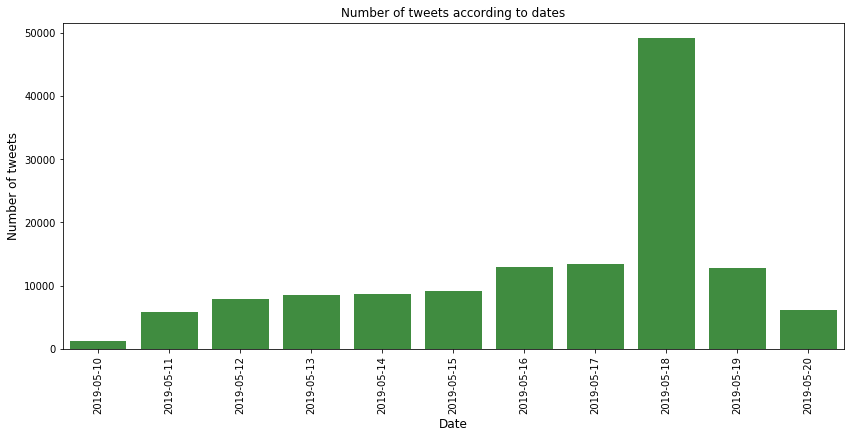

In [15]:
#lets explore created_at column
twitter_data['created_at'] =  pd.to_datetime(twitter_data['created_at'])
cnt_srs = twitter_data['created_at'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

The more tweets was on 2019-05-18.

## Dates on which the most accounts was created (Top10)

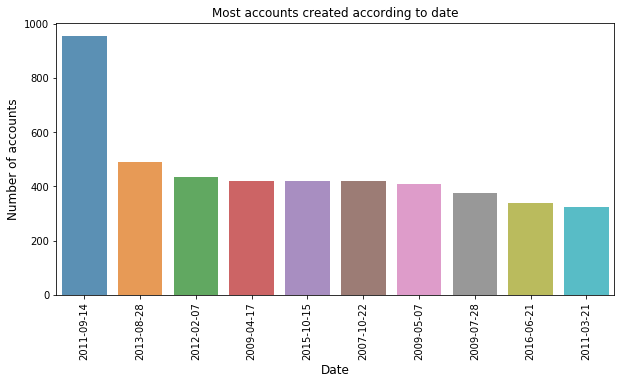

In [16]:
#lets explore user_created_at column
count_  = twitter_data['user_created_at'].dt.date.value_counts()
count_ = count_[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Most accounts created according to date')
plt.xticks(rotation='vertical')
plt.ylabel('Number of accounts', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

We can see the most accounts was created on 2011-09-14.

### Getting the name of the day from the dates.

In [17]:
#lets derive some columns from date colums
twitter_data['tweeted_day_of_week'] = twitter_data['created_at'].dt.weekday_name
twitter_data['created_day_of_week'] = twitter_data['user_created_at'].dt.weekday_name

### Plotting the number of tweets by days of the week.

In [18]:
cnt_ = twitter_data['tweeted_day_of_week'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of tweets per days of the week",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Percentage of Tweets according to days of the week",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

Friday       14622
Monday       14651
Saturday     54879
Sunday       20598
Thursday     12891
Tuesday       8600
Wednesday     9139
Name: tweeted_day_of_week, dtype: int64

## Treemap of number of tweets by days of the week

In [19]:

x = 0.
y = 0.
width = 50.
height = 50.
type_list = list(twitter_data['tweeted_day_of_week'].unique())
values = [len(twitter_data[twitter_data['tweeted_day_of_week'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

We can see most of the tweets was on saturdays and sundays.

## Plotting the number of accounts created by days of the week.

In [20]:
cnt_ = twitter_data['created_day_of_week'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of created accounts per day",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Percentage of accounts created according to days of the week",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

Friday       17196
Monday       21558
Saturday     14990
Sunday       18356
Thursday     21023
Tuesday      20311
Wednesday    21946
Name: created_day_of_week, dtype: int64

## Treemap of number of accounts created by days of the week.

In [21]:
x = 0.
y = 0.
width = 50.
height = 50.
type_list = list(twitter_data['created_day_of_week'].unique())
values = [len(twitter_data[twitter_data['created_day_of_week'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = ['#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-tree')

## Extracting hours from the date columns

In [22]:
#lets extract the hours from the created_at and user_created_at column
twitter_data['created_at_hour'] = twitter_data['created_at'].dt.hour
twitter_data['user_created_at_hour'] = twitter_data['user_created_at'].dt.hour

## Plotting number of tweets per hour

In [23]:
cnt_ = twitter_data['created_at_hour'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of tweets per hour',
              xaxis= dict(title= 'Tweets per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Most members tweeted around 10-11AM.

## Plotting number of accounts created per hour

In [24]:
cnt_ = twitter_data['user_created_at_hour'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(210, 113, 25, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of Accounts Created per hour ',
              xaxis= dict(title= 'Accounts per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Most of the accounts created at 2AM.

## Checking most retweeted and favourite tweet

In [25]:
#most favourite and retweeted tweet
print(f" Maximum number of retweets {twitter_data.retweet_count.max()}")
print(f" Maximum number of favorites {twitter_data.favorite_count.max()}")

 Maximum number of retweets 6622.0
 Maximum number of favorites 15559.0


In [26]:
#lets see the tweet which has the maximum retweet count
twitter_data.loc[twitter_data['retweet_count']==6622.0,'full_text'].values

array(["Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd"],
      dtype=object)

In [27]:
twitter_data.loc[twitter_data['favorite_count']==15559.0,['full_text','user_name','user_description']].values

array([["Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd",
        'Sara A. Carter',
        '@FoxNews Contributor, award winning National Security/War Correspondent. @IWF Fellow. Taking back the story. Follow me on Instagram ScarterDC']],
      dtype=object)

The most retweeted and favorite tweet was same and was tweeted by Sara A. Carter.

In [28]:
#most number of occurances of a person
twitter_data.user_name.value_counts()[:5,]

💧 Sur Plus               937
PM of Australia News     464
🌹MsRose🌹                 415
🍌Leftie Troublemaker🍍    386
Jackie Moss ☔️           300
Name: user_name, dtype: int64

## Wordcloud of user screen name

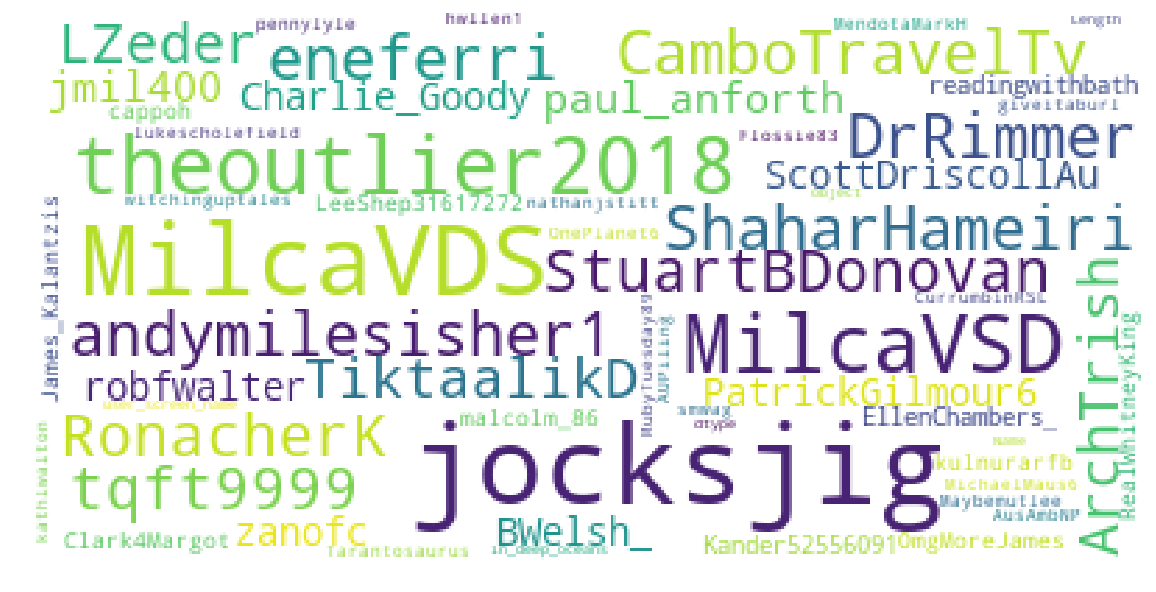

In [29]:
#wordcloud

wordcloud__ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(twitter_data['user_screen_name'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## Word cloud of user description

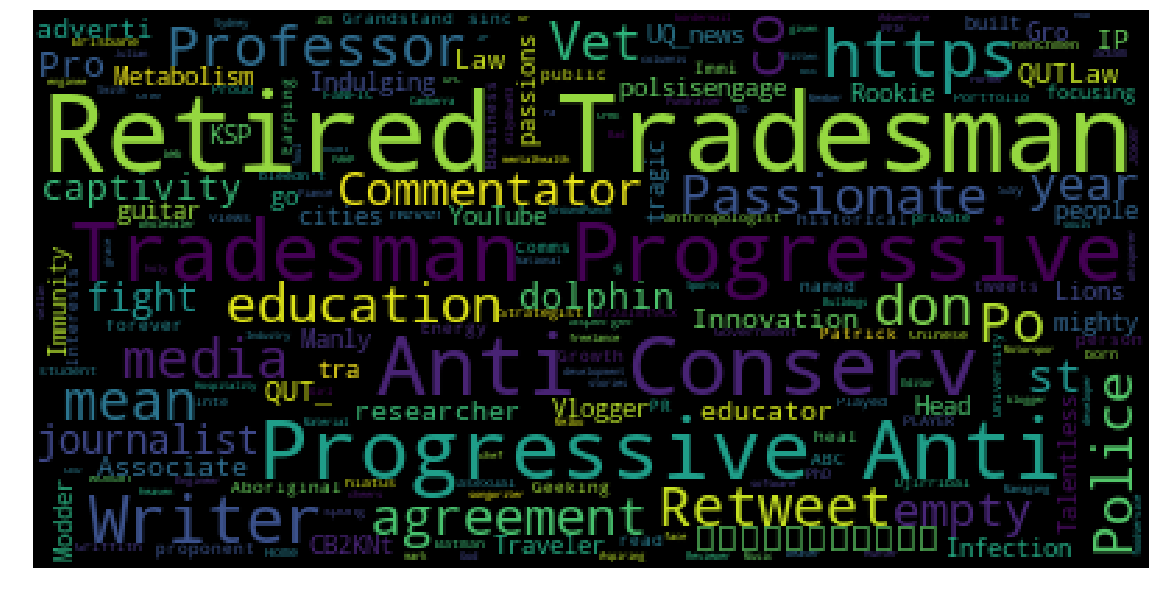

In [30]:
#wordcloud
wordcloud_ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(twitter_data['user_description'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

## Getting the sentiment of the tweets

In [31]:
twitter_data['sentiment'] = twitter_data['full_text'].map(lambda text: TextBlob(text).sentiment.polarity)

## Checking different tweets with different ploarities

In [32]:
print("5 random tweets with highest positive sentiment polarity: \n")
cL = twitter_data.loc[twitter_data.sentiment==1, ['full_text']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest positive sentiment polarity: 

SHE'S ALIVE FOLKS !!!!!!!!!!!!!

#ausvotes #ausvotes2019 #ausvotes19 #auspol https://t.co/UeCrgRLzWG

@ScottMorrisonMP Probably best they don't invest in #ToddCorporation or the @ASX then, otherwise their savings will be stolen from them!

#auspol #ausbiz

Wonderful news, I'll bet bougeois Bill is divorced within the year.

I can see it in her face. #auspol 

https://t.co/RBtk2MQqOF via @GoogleNews

3 gen. of my family walked together to vote today. About to have a roast while watching @AntonyGreenABC :D
#ausvotes #chisolm #LibSpill

#AUSTRALIA KICK THE
C#^%$ OUT!!! LOL!!!
#auspol



In [33]:
print("5 random tweets with highest nagative sentiment polarity: \n")
cL = twitter_data.loc[twitter_data.sentiment==-1, ['full_text']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest nagative sentiment polarity: 

This has been an absolutely awful weekend #ALeagueGF #auspol

the polls close at 6, so after that its time for anxiety to set in. and for people who drink to start drinking 

but until they close the polls , im not going to try and follow blow by blow #auspol because that's a way to get real frustrated and antsy

Now we wait for @SenKimCarr @BOConnorMP @fitzhunter @SwannyQLD @JEChalmers @kailamurnain @kimbakit @polley_helen to summon Labor caucus to Canberra “to pledge support for Bill Shorten” again like they did in 2016, despite another devastating Labor LOSS. #ChangeTheLeader #ausvotes

#Australia #Politics #Government #Elections --&gt; Australia’s conservative party retains power in shocking election result https://t.co/28ptEGPXri

#BREAKING Anthony Albanese officially announces he'll be a candidate for Labor leader. He says the election is a "devastating result" for Labor and the party needs to examine the outcome #ausvot

In [34]:
print("5 random tweets with neutral sentiment polarity: \n")
cL = twitter_data.loc[twitter_data.sentiment==0, ['full_text']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with neutral sentiment polarity: 

Hannibal Crabb and Peter Wong on Australia Votes #auspol #australiavotes2019 #ausvotes https://t.co/s4Lo3VEjpa

@PPantsdown Cleaning it out....🧹🧚‍♀️💨💨 #auspol

At the "this is stressful" phase of the night. #ausvotes

No polling booth or #democracysausage in sight...lining up for the @ALDIAustralia snow sale...#auspol2019 #auspol #ausvotes https://t.co/NUEG6ZD9pg

ADV Election Summary: How Labor lost Middle Australia #auspol https://t.co/QepdQUF9sV



## Histogram plot of sentiment

In [35]:
trace1 = go.Histogram(
    x = twitter_data['sentiment'],
    opacity=0.75,
    name = "Sentiment",
    marker=dict(color='rgba(122, 75, 196, 0.6)'))

data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Histogram plot of sentiment',
                   xaxis=dict(title='Sentiment'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

most of the tweets are with zero polarity.

## Mapping sentiment to polarities(positive,neutral,negative)

In [36]:
cut = pd.cut(
    twitter_data['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
twitter_data['polarity'] = cut.values
twitter_data[['polarity','sentiment']][:20]

,polarity,sentiment
0,negative,-0.200000
1,negative,-0.600000
2,neutral,0.000000
3,negative,-0.200000
4,negative,-0.035714
5,positive,0.500000
6,positive,0.136364
7,positive,0.050000
8,positive,0.300000
9,positive,0.200000


In [37]:
twitter_data['polarity'].value_counts()

positive    58448
neutral     48831
negative    28101
Name: polarity, dtype: int64

## Radar chart of polarities

In [38]:
data = [go.Scatterpolar(
  r = [twitter_data['polarity'].value_counts()[0],twitter_data['polarity'].value_counts()[1],twitter_data['polarity'].value_counts()[2]],
  theta = list(twitter_data['polarity'].unique()),
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 60000]
    )
  ),
  showlegend = False,
  title ='Radar chart of polarities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

## Extracting features from tweets
1. count of sentences
2. count of words
3. count of unique words
4. count of letters
5. count of punctuations
6. count of uppercase words/letters
7. count of stop words
8. Avg length of each word

In [39]:
twitter_data['count_sent']=twitter_data["full_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
twitter_data['count_word']=twitter_data["full_text"].apply(lambda x: len(str(x).split()))
#Unique word count
twitter_data['count_unique_word']=twitter_data["full_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
twitter_data['count_letters']=twitter_data["full_text"].apply(lambda x: len(str(x)))
#punctuation count
twitter_data["count_punctuations"] =twitter_data["full_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
twitter_data["count_words_upper"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
twitter_data["count_words_title"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
twitter_data["count_stopwords"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
twitter_data["mean_word_len"] = twitter_data["full_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [40]:
twitter_data.describe().T

,count,mean,std,min,25%,50%,75%,max
retweet_count,135380.0,4.063806e+00,4.038760e+01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,6.622000e+03
favorite_count,135380.0,1.205471e+01,1.275849e+02,0.000000,0.000000e+00,1.000000e+00,4.000000e+00,1.555900e+04
user_id,135380.0,1.570645e+17,3.525078e+17,22.000000,7.356489e+07,3.675327e+08,2.590368e+09,1.130063e+18
lat,135380.0,-2.018124e+01,2.755893e+01,-82.862752,-3.528094e+01,-3.292827e+01,-2.527440e+01,9.000000e+01
long,135380.0,1.106561e+02,7.855528e+01,-175.198242,1.337751e+02,1.449631e+02,1.512093e+02,1.784501e+02
created_at_hour,135380.0,9.892251e+00,6.836245e+00,0.000000,4.000000e+00,9.000000e+00,1.300000e+01,2.300000e+01
user_created_at_hour,135380.0,9.218415e+00,6.749257e+00,0.000000,4.000000e+00,8.000000e+00,1.300000e+01,2.300000e+01
sentiment,135380.0,7.946320e-02,2.815131e-01,-1.000000,0.000000e+00,0.000000e+00,2.000000e-01,1.000000e+00
count_sent,135380.0,1.850266e+00,1.859723e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.500000e+01
count_word,135380.0,2.335182e+01,1.313643e+01,1.000000,1.300000e+01,2.100000e+01,3.300000e+01,9.800000e+01


## Pairplot of text based features

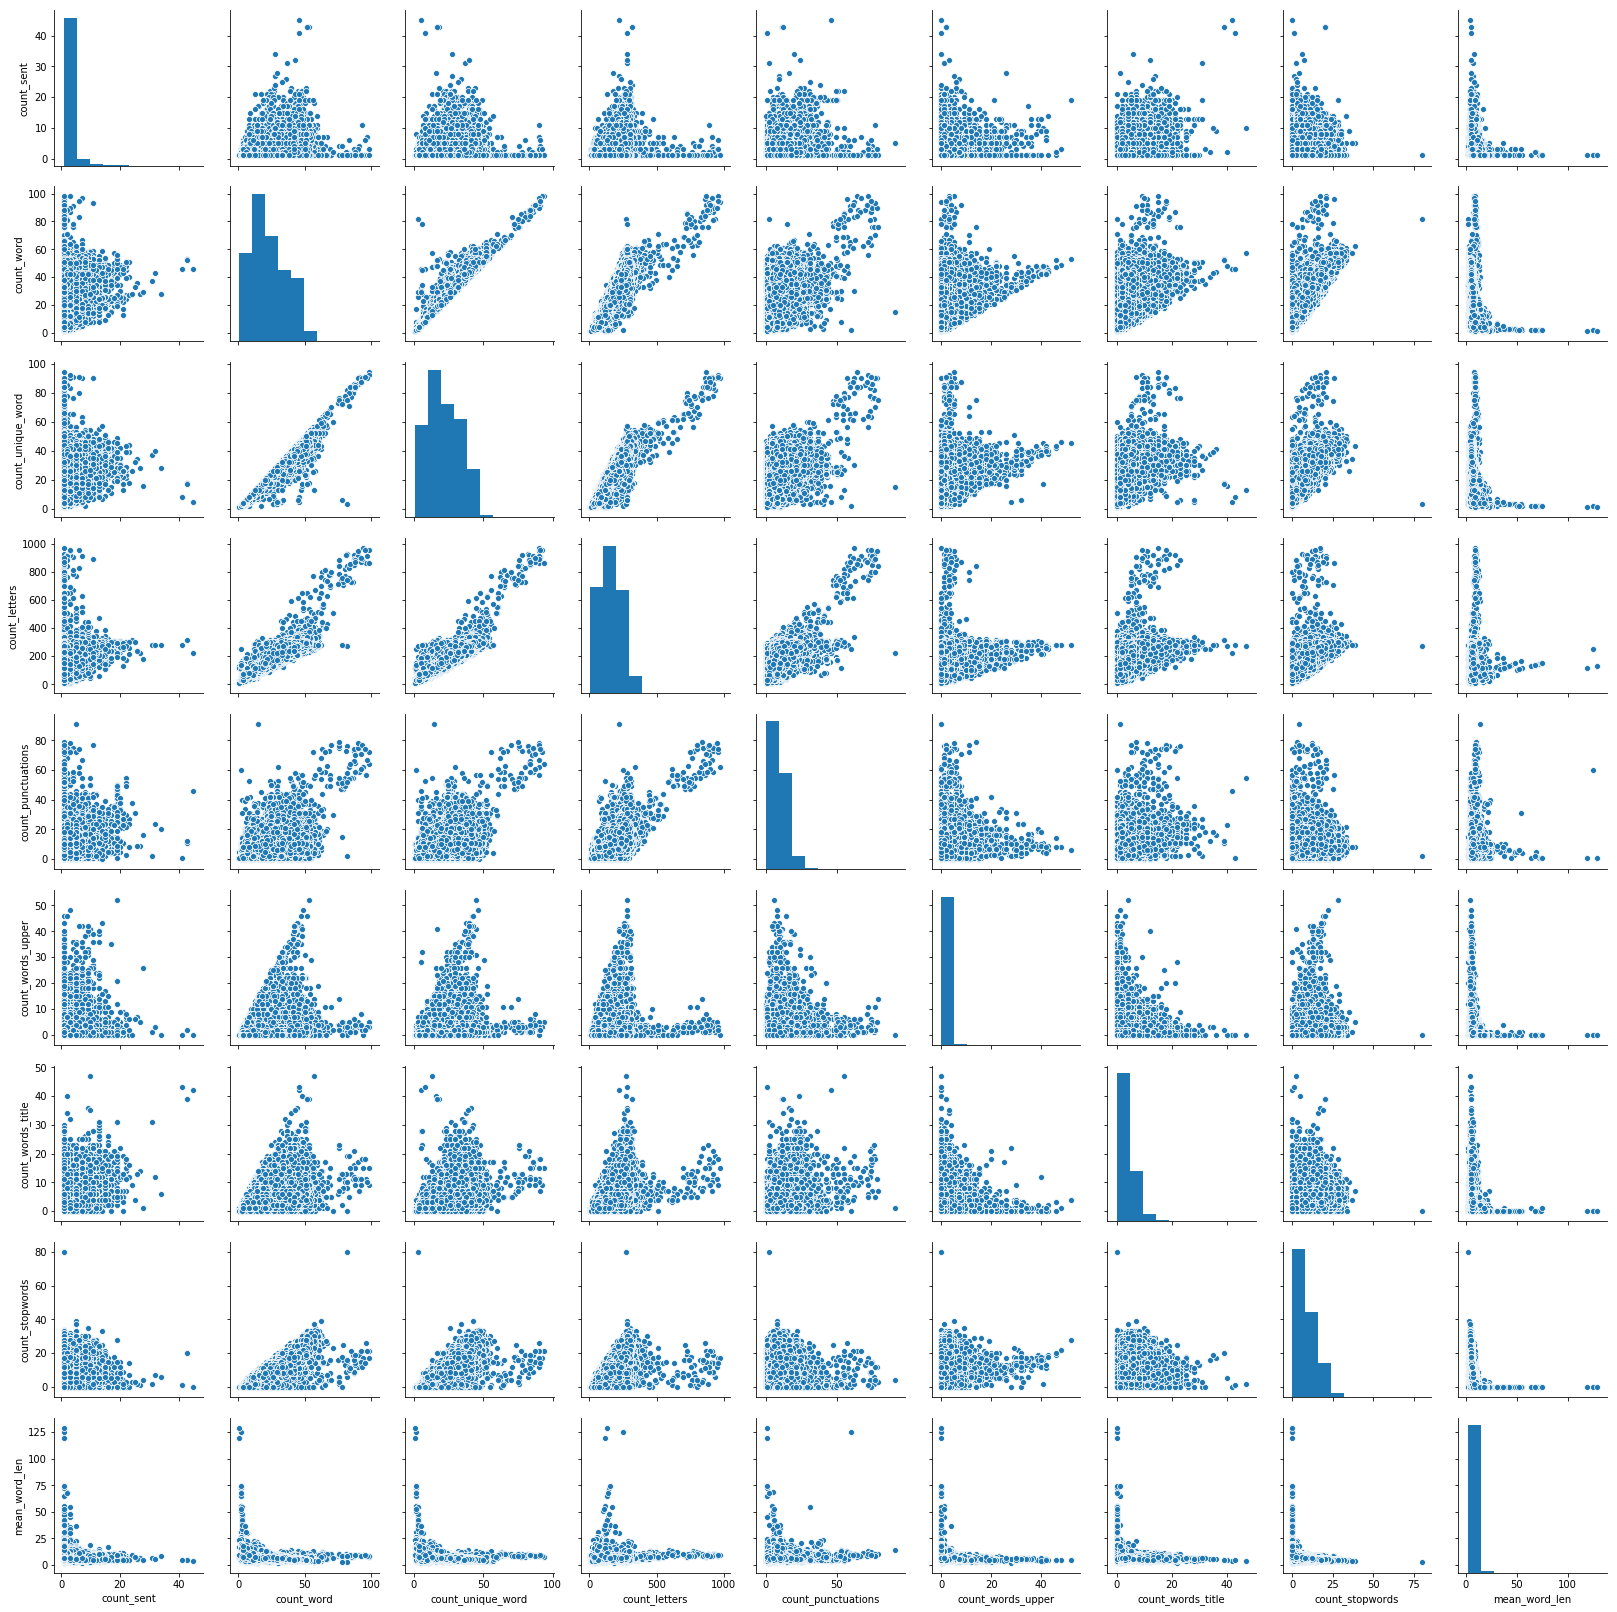

In [41]:
sample_df = twitter_data[['count_sent','count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len' ]]
sns.pairplot(sample_df,palette="husl")
del sample_df

## Ngrams Visualisations of tweets

In [42]:

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"
                                          ])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots.html')


This is the format of your plot grid:
[ (1,1) x1,y1 ]



/opt/conda/lib/python3.6/site-packages/plotly/basedatatypes.py:1233: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [43]:
freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams"
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



/opt/conda/lib/python3.6/site-packages/plotly/basedatatypes.py:1233: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [44]:
freq_dict = defaultdict(int)
plotly.tools.set_credentials_file(username='Ratan2513', api_key='Pxh1iyluGYYjRbo13n0G')
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams", 
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1500, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



/opt/conda/lib/python3.6/site-packages/plotly/basedatatypes.py:1233: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Ratan2513/0 or inside your plot.ly account where it is named 'word-plots'


## Plotting number of tweets by state(Top 20)

In [45]:
cnt_ = twitter_data['user_location'].value_counts()
cnt_.reset_index()
cnt_ = cnt_[:20,]
trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweets on Australia polls by state.",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets on Australia polls by state.')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Visualizing number of tweets by state

In [46]:
data = [go.Scattermapbox(
            lat= twitter_data['lat'] ,
            lon= twitter_data['long'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'orange',
                opacity = .8,
            ),
          )]
layout = go.Layout(
    title = go.layout.Title(
        text = 'Tweets on Australia polls by state'
    ),
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth')

/opt/conda/lib/python3.6/site-packages/chart_studio/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/opt/conda/lib/python3.6/site-packages/chart_studio/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some s

## Tweets on Australia polls according to polarity by state 

In [47]:
trace1 = go.Scattermapbox(
            lat= twitter_data.loc[twitter_data['polarity'] == 'negative','lat'] ,
            lon= twitter_data.loc[twitter_data['polarity'] == 'negative','long'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'black',
                opacity = .5,
            ),
          )
trace2= go.Scattermapbox(
            lat= twitter_data.loc[twitter_data['polarity'] == 'neutral','lat'] ,
            lon= twitter_data.loc[twitter_data['polarity'] == 'neutral','long'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'blue',
                opacity = .3,
            ),
          )
trace3= go.Scattermapbox(
            lat= twitter_data.loc[twitter_data['polarity'] == 'positive','lat'] ,
            lon= twitter_data.loc[twitter_data['polarity'] == 'positive','long'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'gold',
                opacity = .2,
            ),
          )


data = [trace1,trace2,trace3]
layout = go.Layout(
    title = go.layout.Title(
        text = 'Tweets on Australia polls according to polarity by state '
    ),
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(200, 125, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-ma')

/opt/conda/lib/python3.6/site-packages/chart_studio/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/opt/conda/lib/python3.6/site-packages/chart_studio/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some s

## Topic modeling
**Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.**

## Count Vectorizers for the data

In [48]:
vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = vectorizer_.fit_transform(twitter_data['full_text'])

<input>:1: DeprecationWarning:

invalid escape sequence \-

<input>:1: DeprecationWarning:

invalid escape sequence \-

<input>:1: DeprecationWarning:

invalid escape sequence \-

<ipython-input-48-2228b145da40>:1: DeprecationWarning:

invalid escape sequence \-



## Applying Latent Dirichlet Allocation models

In [49]:
lda_ = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online',verbose=True)
tweets_lda = lda_.fit_transform(tweets_vectorized)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


## Printing keywords

In [50]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [51]:
print("Tweets LDA Model:")
selected_topics(lda_, vectorizer_)

Tweets LDA Model:
Topic 0:
[('auspol', 10320.238802527429), ('amp', 5544.633535426768), ('climate', 4949.979362425955), ('change', 4915.425298566888), ('campaign', 3619.057313075161), ('years', 3175.681096541151), ('australianlabor', 2886.5290775816316), ('https', 2821.2372193629017), ('government', 2731.577465092409), ('liberalaus', 2450.9903553208183)]
Topic 1:
[('auspol', 13830.198525653408), ('ausvotes', 11093.097412587224), ('australia', 6342.468898722923), ('vote', 5392.3010002889305), ('https', 4392.699736336272), ('like', 4233.675822050221), ('just', 3532.8753374514745), ('lnp', 3221.7172394122704), ('don', 3023.070134242574), ('election', 2956.195229882135)]
Topic 2:
[('auspol', 9254.701241508876), ('https', 6280.39878152303), ('shorten', 5238.816423786869), ('ausvotes', 4931.606887988025), ('labor', 4233.541946019458), ('minister', 3552.463377198447), ('bob', 3207.359246903178), ('hawke', 3100.125534524699), ('prime', 3075.637030839482), ('leader', 2602.4003851858643)]
Topic 

## Visualizing LDA results of tweets with pyLDAvis

In [52]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_, tweets_vectorized, vectorizer_, mds='tsne')
dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8     -247.884277 -208.214386       1        1  15.199728
1      121.271080   20.131046       2        1  13.529845
0     -103.672226   30.512434       3        1  10.387862
7       -2.858255 -227.447754       4        1  10.052133
6     -355.677307   42.058956       5        1   9.267356
2       20.461580  278.158112       6        1   8.872606
3      242.899231 -230.857285       7        1   8.661221
9      265.508759  258.737762       8        1   8.589145
5      373.268402    8.434394       9        1   7.728481
4     -225.334778  281.382965      10        1   7.711623, topic_info=      Category          Freq   ...     loglift  logprob
term                           ...                     
8180   Default  78078.000000   ...     30.0000  30.0000
1254   Default  70185.000000   ...     29.0000  29.0000
5508   Default  27399.000000   ...     28.0000  28.0000
18719  Default  15589.000000   ...     27.0000  27.0000
1185   Default  88882.000000   ...     26.0000  26.0000
640    Default  11671.000000   ...     25.0000  25.0000
15699  Default   5335.000000   ...     24.0000  24.0000
11614  Default   6411.000000   ...     23.0000  23.0000
12650  Default   7759.000000   ...     22.0000  22.0000
3191   Default   4951.000000   ...     21.0000  21.0000
2848   Default   4916.000000   ...     20.0000  20.0000
1240   Default   5617.000000   ...     19.0000  19.0000
1217   Default  25684.000000   ...     18.0000  18.0000
9592   Default  14014.000000   ...     17.0000  17.0000
18768  Default   3983.000000   ...     16.0000  16.0000
5091   Default   6073.000000   ...     15.0000  15.0000
1251   Default   4859.000000   ...     14.0000  14.0000
10993  Default   3618.000000   ...     13.0000  13.0000
2529   Default   3620.000000   ...     12.0000  12.0000
15250  Default   4661.000000   ...     11.0000  11.0000
1976   Default   3266.000000   ...     10.0000  10.0000
34     Default   3182.000000   ...      9.0000   9.0000
7794   Default   3157.000000   ...      8.0000   8.0000
10115  Default   5268.000000   ...      7.0000   7.0000
13368  Default   3132.000000   ...      6.0000   6.0000
11204  Default   6495.000000   ...      5.0000   5.0000
48     Default   2890.000000   ...      4.0000   4.0000
7379   Default   4871.000000   ...      3.0000   3.0000
9999   Default   6769.000000   ...      2.0000   2.0000
19444  Default   3646.000000   ...      1.0000   1.0000
...        ...           ...   ...         ...      ...
4344   Topic10    463.457760   ...      2.5605  -5.6666
493    Topic10    461.819445   ...      2.5605  -5.6701
17676  Topic10    459.503832   ...      2.5605  -5.6752
335    Topic10    434.091672   ...      2.5604  -5.7320
7262   Topic10    433.583538   ...      2.5604  -5.7332
19368  Topic10    429.818318   ...      2.5603  -5.7419
14401  Topic10    406.433654   ...      2.5602  -5.7979
2371   Topic10    400.921725   ...      2.5602  -5.8115
7762   Topic10    364.812067   ...      2.5600  -5.9059
14821  Topic10    364.179482   ...      2.5600  -5.9077
17473  Topic10    358.818166   ...      2.5599  -5.9225
17378  Topic10    349.951134   ...      2.5599  -5.9475
1440   Topic10    343.414482   ...      2.5598  -5.9664
12561  Topic10    343.281114   ...      2.5598  -5.9667
8394   Topic10    342.184322   ...      2.5598  -5.9699
13063  Topic10   1950.099298   ...      2.2810  -4.2297
14031  Topic10   1487.564333   ...      2.0023  -4.5004
1254   Topic10   8304.757836   ...      0.4281  -2.7807
19458  Topic10    732.541949   ...      2.0503  -5.2088
1185   Topic10   9038.329915   ...      0.2766  -2.6961
10230  Topic10    691.046472   ...      2.0659  -5.2671
8180   Topic10   7318.470399   ...      0.1951  -2.9071
9938   Topic10    526.087920   ...      2.1948  -5.5398
1152   Topic10    481.025725   ...      2.2837  -5.6294
3238   Topic10    525.209945   ...      2.1292  -5.5415
15144  Topic1

**Thanks for reading this. I welcome suggestions to improve this kernel further.**